In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler




In [6]:
# Load cleaned data
df = pd.read_csv(r"D:\aml-project\data\processed\LI-Small_Trans.csv")

In [7]:
df.columns

Index(['Timestamp', 'From_Bank', 'From_Account', 'To_Bank', 'To_Account',
       'Amount_Received', 'Receiving_Currency', 'Amount_Paid',
       'Payment_Currency', 'Payment_Format', 'Is_Laundering',
       'Currency_Mismatch'],
      dtype='object')

In [7]:
features = [
    "Amount_Received",
    "Amount_Paid",
    "Currency_Mismatch" if "Currency_Mismatch" in df.columns else None
]

# Drop missing features
features = [f for f in features if f in df.columns]

X = df[features].copy()

# Replace True/False with 1/0 if needed
if "Currency_Mismatch" in X.columns:
    X["Currency_Mismatch"] = X["Currency_Mismatch"].astype(int)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df["Anomaly_Score"] = model.fit_predict(X_scaled)

# Map to 0/1
df["Is_Anomaly"] = (df["Anomaly_Score"] == -1).astype(int)

# Show anomaly rate
print(f"Anomaly rate: {df['Is_Anomaly'].mean()*100:.2f}%")


Anomaly rate: 2.00%


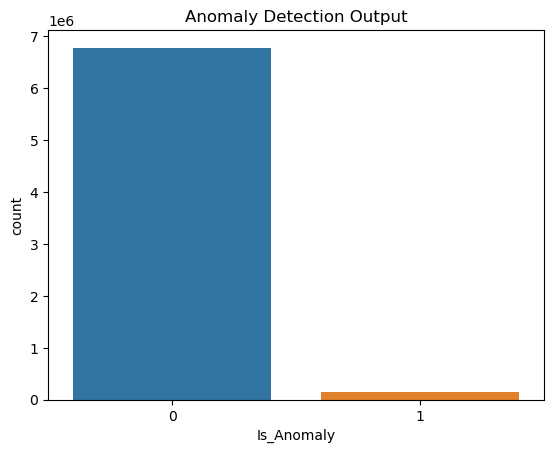

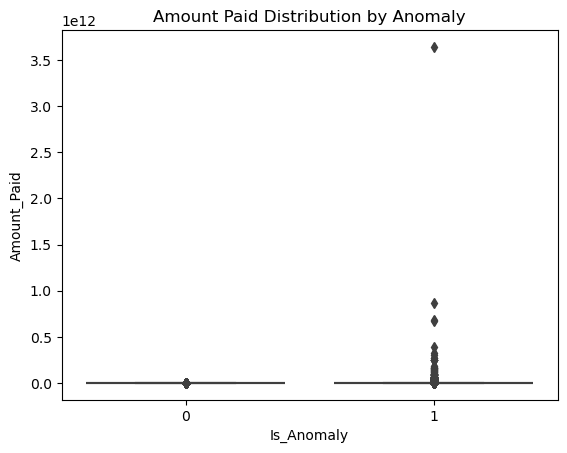

In [9]:
sns.countplot(x="Is_Anomaly", data=df)
plt.title("Anomaly Detection Output")
plt.show()

sns.boxplot(data=df, x="Is_Anomaly", y="Amount_Paid")
plt.title("Amount Paid Distribution by Anomaly")
plt.show()


In [10]:
import joblib

os.makedirs("../models/", exist_ok=True)
joblib.dump(model, "../models/isolation_forest.pkl")

df.to_csv("../data/processed/with_anomalies.csv", index=False)
